In [ ]:
import libmi
from grade_classif.imports import *
from grade_classif.models.plmodules import Normalizer
from grade_classif.params.parser import hparams
from grade_classif.data.color import rgb_to_h
from grade_classif.data.utils import np_to_tensor

In [ ]:
data = Path('/data/DeepLearning/SCHWOB_Robin/PACS04_06P028/testproj')

In [ ]:
source = libmi.Slide(str(data))

In [ ]:
source.LoadProject()

In [ ]:
print(source.GetWidth(), source.GetHeight())

89946 199908


In [ ]:
h = w = 598

In [ ]:
hparams.open_mode = 'H'
hparams.transforms = 1
hparams.normalizer = 'cbr_5_32_4'
#hparams.loss = 'mse'
hparams.size = 299
hparams.gpus = [0]
hparams.filt = 'all'
hparams.batch_size = 16
hparams.patch_classes = None
hparams.norm_csv = None
hparams.concept_classes = None
hparams.data = Path('/data/DeepLearning/SCHWOB_Robin/Patches_1024/Patches_1024_1/1')
hparams.data_csv = Path('/home/DeepLearning/grade_classif/csvs/scans.csv')

In [ ]:
norm = Normalizer(hparams)

In [ ]:
norm.load('6cacb7558df8464a843775ca6694ed3b')

In [ ]:
norm.freeze()

In [ ]:
x_max = source.GetWidth()/1.5
y_max = source.GetHeight()/1.5
bar = tqdm(total=int(np.ceil(x_max/w)*np.ceil(y_max/h)))
x = 0
while x < x_max:
    y = 0
    while y < y_max:

        source.SetCurrentRegion((x, y), (w, h))
        source.SetRegionSize((299, 299))
        tile = source.ReadRegion()

        # Output image
        dtype = tile.dtype

        img = tile[..., :3]
        alpha = tile[..., 3]
        img = img.astype(np.float32) / 255
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Runt the loop through BGR channels
        img = np_to_tensor(img, "image").to(norm.main_device)
        img = rgb_to_h(img.unsqueeze(0))
        img = norm.predict(img).clamp(0, 1).detach()
        img = img.cpu().numpy().transpose(0, 2, 3, 1)
        img = (img * 255).astype(dtype)
        img = np.concatenate((img.squeeze(0), alpha[..., None]), axis=-1)
        source.WriteSegm(img, None)

        #print('color correction: %d, %d' % (x, y))
        bar.update()

        y += h
    x += w
bar.close()

In [ ]:
source.SetCurrentRegion((25000, 100000), (2000, 2000))
source.SetRegionSize((500, 500))
region = source.ReadSegm()

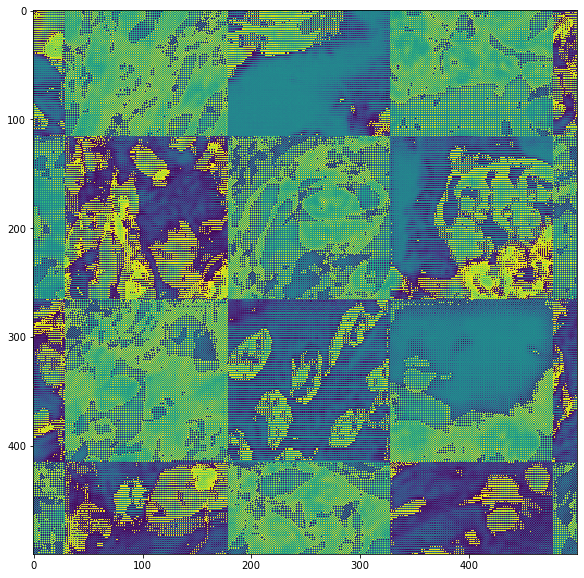

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(region)

In [ ]:
slide.SetCurrentRegion((25000, 100000), (2000, 2000))
slide.SetRegionSize((500, 500))
region = slide.ReadRegion()

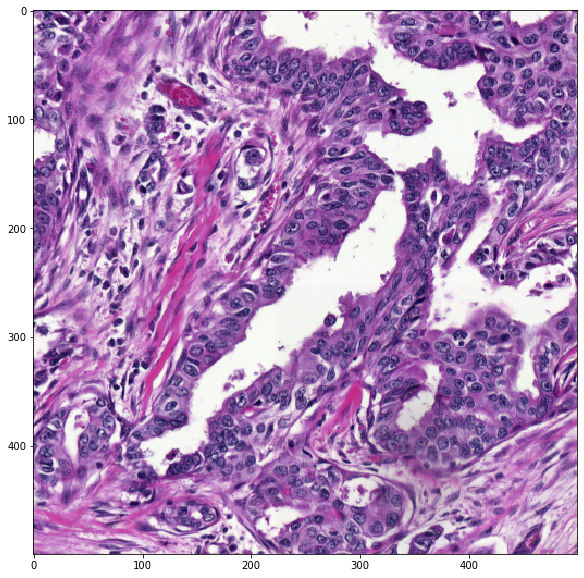

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

In [ ]:
from openslide import OpenSlide
import numpy as np

In [ ]:
slide = OpenSlide(str(data/'CF_PACS04rescan_06P028.mrxs'))

In [ ]:
region = slide.read_region((25000, 100000), 0, (2000, 2000))

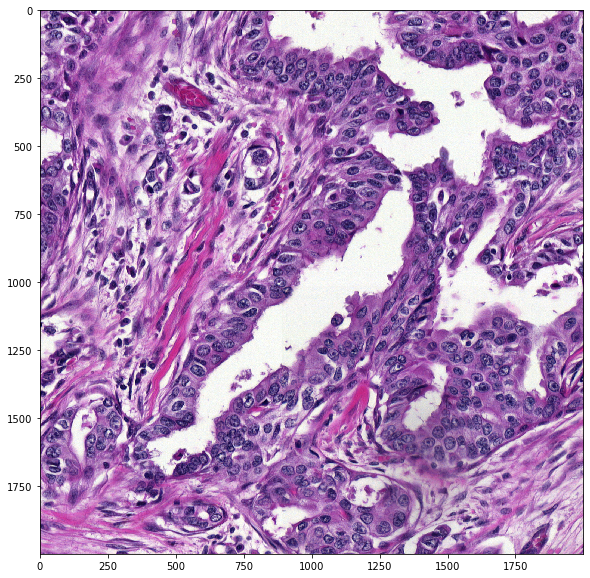

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(region)